## Leidy Araque Molina - COD: 201727196
## Nicolás Leguizamón - COD: 201727960

# Exercise 06
# TensorFlow and Keras


---

In [2]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

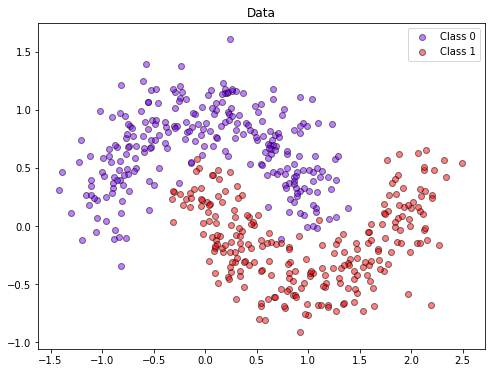

In [3]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

In [4]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

C:\Users\avill\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [6]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid')
   
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

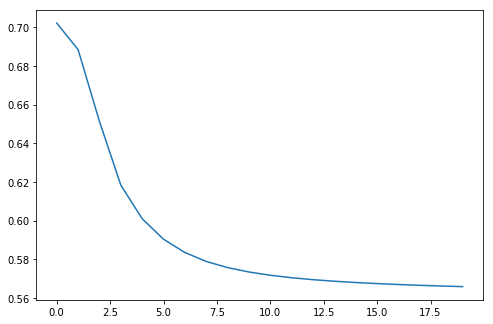

In [7]:
num_epochs = 1000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

[[ 4.196827    2.0916767 ]
 [-5.6239614  -2.8076453 ]
 [-1.1542561   1.5217716 ]
 [ 2.421036   -1.9262732 ]
 [-1.4100431   0.47032645]
 [-1.2501698   0.52522874]
 [-1.4299979   2.2158768 ]
 [ 0.7157964   0.06873678]
 [ 1.4004035   1.38112   ]
 [ 0.7676504   0.5406101 ]]
[[-8.361149]]


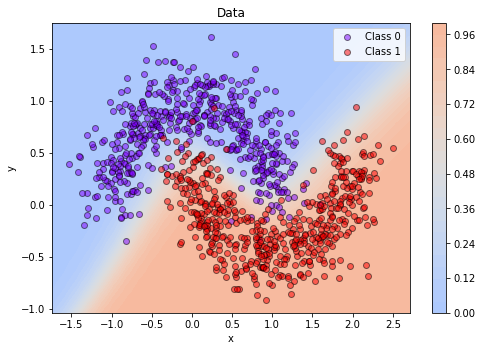

In [49]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

In [19]:
#Clossing the session.
sess.close()

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


### Text classifier

In [34]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
import keras
from keras.optimizers import SGD
%matplotlib inline

In [35]:
max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Loading data...
8982 train sequences
2246 test sequences
46 classes


In [36]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [37]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


# The performance of the text classifier in the Keras handout = 0.52%

### Different combination # 1

In [61]:
model1 = Sequential()
keras.initializers.Constant(value=0)#Different initializer
model1.add(Dense(256, input_shape=(max_words,)))
model1.add(Activation('selu'))#Different activation function
model1.add(Dropout(0.3))#Dropout
model1.add(Dense(num_classes))    
model1.add(Activation('selu'))#Different activation function
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               256256    
_________________________________________________________________
activation_29 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 46)                11822     
_________________________________________________________________
activation_30 (Activation)   (None, 46)                0         
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
_________________________________________________________________


In [64]:
model1.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])#Different optimizer

history = model1.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 360us/step - loss: 0.0090 - acc: 0.7988 - val_loss: 0.0097 - val_acc: 0.7453
Epoch 2/5
8083/8083 [==============================] - 2s 199us/step - loss: 0.0088 - acc: 0.8018 - val_loss: 0.0096 - val_acc: 0.7597
Epoch 3/5
8083/8083 [==============================] - 2s 193us/step - loss: 0.0087 - acc: 0.8037 - val_loss: 0.0102 - val_acc: 0.7620
Epoch 4/5
8083/8083 [==============================] - 2s 199us/step - loss: 0.0087 - acc: 0.8103 - val_loss: 0.0097 - val_acc: 0.7553
Epoch 5/5
8083/8083 [==============================] - 2s 199us/step - loss: 0.0086 - acc: 0.8077 - val_loss: 0.0097 - val_acc: 0.7608


In [65]:
score = model1.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 65us/step
Test score: 0.00934763089857352
Test accuracy: 0.7631344612644702


# The performance of the text classifier in the combination # 1 = 0.76%

### Different combination # 2

In [66]:
model2 = Sequential()
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)#Different initializer
model2.add(Dense(256, input_shape=(max_words,)))
model2.add(Activation('tanh'))#Different activation function
model2.add(Dropout(0.5))#Dropout
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))#Different activation function
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               256256    
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 46)                11822     
_________________________________________________________________
activation_32 (Activation)   (None, 46)                0         
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
_________________________________________________________________


In [72]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])#Different optimizer

history = model2.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 364us/step - loss: 1.3493 - acc: 0.7021 - val_loss: 1.0719 - val_acc: 0.7786
Epoch 2/5
8083/8083 [==============================] - 2s 206us/step - loss: 0.8354 - acc: 0.8136 - val_loss: 0.9506 - val_acc: 0.7998
Epoch 3/5
8083/8083 [==============================] - 2s 204us/step - loss: 0.6598 - acc: 0.8503 - val_loss: 0.9040 - val_acc: 0.8009
Epoch 4/5
8083/8083 [==============================] - 2s 206us/step - loss: 0.5601 - acc: 0.8743 - val_loss: 0.8948 - val_acc: 0.8042
Epoch 5/5
8083/8083 [==============================] - 2s 208us/step - loss: 0.4878 - acc: 0.8898 - val_loss: 0.8896 - val_acc: 0.7953


In [73]:
score = model2.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 70us/step
Test score: 0.8775411384613091
Test accuracy: 0.802760463045414


# The performance of the text classifier in the combination # 1 = 0.80%

### La mejor configuración, pues incrementó el valor del accuracy sobre el test, es la combinación número 2, que alcanzó un 80%.